<a href="https://colab.research.google.com/github/CatarinaRRF/Churn_Alura_Voz/blob/main/%20notebooks/Relat%C3%B3rio-de-An%C3%A1lise-II_Visualiza%C3%A7%C3%A3o-dos-Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<img style="display: inline; margin: 15px 0;" title="heartica_logo" src= https://raw.githubusercontent.com/CatarinaRRF/Churn_Alura_Voz/main/data/external/logo_alura_voz.png alt="" width="50" height="50"/><font color=2C3E50> Ralatório de Análise II - Visualização dos Dados</font>**

image.png

<font size="3.5">
<nav>
<a href='https://colab.research.google.com/drive/1D_-bOaoy-H7ybiezjz6tnRLLnJIYbpMz#scrollTo=5S96UuX-kSan'> Relatório I - Tratamento dos dados</a> ||
<a href='https://colab.research.google.com/drive/1OEbCcqU4XS1l95fLunfQOuunN6vgx_xW'> Relatório III - Modelagem dos dados</a> ||
<a href='https://colab.research.google.com/drive/1dr5ARLZ5a0NRIaGm5Lr5mPavn4hyNwVj'>Relatório de Análise IV - Dashboard</a> ||
<a href='https://github.com/CatarinaRRF/Churn_Alura_Voz'>Github</a> ||

</nav>

---
[Palleta](https://coolors.co/2c3e50-415c76-7b99b7-82d712-b6ea44)

# <font color=2C3E50> **01. Introdução**

<div style="text-align:justify">

A <font color=82D712><b>análise exploratória de dados (EDA)</b></font> tem como intenção a analise e investigação dos conjuntos de dados e resumir suas principais características, geralmente usando métodos de visualização de dados. Deste modo, este relatório abordará o EDA a partir de <b>3 hipótesis principais</b> e a visualização de dados como direcionadores para a análise. <sup><a href="https://www.ibm.com/br-pt/cloud/learn/exploratory-data-analysis">[1]</a></sup>
<br>
A visualização de dados é a apresentação de dados em um formato pictórico ou gráfico. Ela permite que os tomadores de decisão vejam as análises apresentadas visualmente, para que possam entender conceitos difíceis ou identificar novos padrões. Com a <font color=82D712><b>visualização interativa</b></font> (ploty), você pode levar o conceito um passo adiante usando a tecnologia para detalhar gráficos e gráficos para obter mais detalhes, alterando interativamente quais dados você vê e como eles são processados.
<br>
Um dos maiores desafios da <b>visualição de dados</b> é decidir quais recursos visuais usar para melhor representar as informações, por essa razão se torna importante identificar o tipo de data que se tem e qual tipo de análise desejado. <br>

# <font color=2C3E50><b>02. Impotação e Formação de Hipóteses<b>

<font color=82D712> **Importando Bibliotecas**

In [ ]:
baixar = ! pip install jupyter-dash

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns

In [ ]:
#Plotly
import plotly as go
import plotly.express as px

#Dash
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output

In [ ]:
df_aluravoz = pd.read_csv('/content/data_alura_voz.csv')
df_aluravoz = df_aluravoz.rename (columns = {'Internet_Fiber optic':'Internet_Fiber_Optic'})
df_aluravoz.head()

,Churn,Sexo,Idoso,Parceiros,Dependentes,Tenure,Telefonia,Multiplas_Linhas,Segurança_On-line,Backup_On-line,...,Cobrança_Diário,Cobrança_Mensal,Cobrança_Total,Contrato_Mensal,Contrato_Anual,Contrato_Bianual,Pagamento_Transferência(Auto),Pagamento_Cartão_Crédito(Auto),Pagamento_Cheque_Eletronico,Pagamento_Cheque_Email
0,0,1,0,1,1,9,1,0,0,1,...,2.15,65.6,593.30,0,1,0,0,0,0,1
1,0,0,0,0,0,9,1,1,0,0,...,1.96,59.9,542.40,1,0,0,0,0,0,1
2,1,0,0,0,0,4,1,0,0,0,...,2.42,73.9,280.85,1,0,0,0,0,1,0
3,1,0,1,1,0,13,1,0,0,1,...,3.21,98.0,1237.85,1,0,0,0,0,1,0
4,1,1,1,1,0,3,1,0,0,0,...,2.75,83.9,267.40,1,0,0,0,0,0,1


<font color=82D712><b>Verificando a % de churn</b>

In [ ]:
frequenciaC = df_aluravoz['Churn'].value_counts()
percentualC = round(df_aluravoz['Churn'].value_counts(normalize = True) * 100)
freq_C = pd.DataFrame({'Frequência': frequenciaC, 'Porcentagem (%)': percentualC})
freq_C.rename(index = {0: 'Não evadiu', 1: 'evadiu'}, inplace = True)
freq_C 

,Frequência,Porcentagem (%)
Não evadiu,5174,73.463013
evadiu,1869,26.536987



---

> <font size="2.5">27% dos clientes evadiram a empresa.</font>

<font color=82D712> **Criando uma matrix de Correlação**

> Uma <b>matriz de correlação</b> é uma tabela que representa os coeficientes de conexão entre os fatores. Cada célula da tabela mostra o link entre dois fatores. As grades vinculadas são usadas para delinear informações como uma contribuição para uma investigação mais aprofundada e como uma indicação de inspeção de fronteira. Será usada com ferramenta para criação inicial das hipótesis.

In [ ]:
palleta = sns.blend_palette(colors=('#2C3E50','#82D712','#B6EA44'), as_cmap=True)
sns.set_theme(style="whitegrid")

In [ ]:
# mostra apenas as partes
corrmat = df_aluravoz.corr(method = 'kendall')

#Plot
fig = px.imshow(corrmat, title='<b>Matrix de Correlação</b>: Clientes da Alura Voz', color_continuous_scale='viridis', aspect="auto")
fig.update_xaxes()
fig.show()


---

<font color=82D712 size="5"><b>Conclusões</b></font>

A <font color=82D712><b>Primeira hipótese</b></font> é há da possibilidade de clientes que pagaram um valor acima da media geral na Cobrança Mensal, possuem maior taxa de evasão que os outros, e caso a hipotese seja confirmada, analizar a razão deste valor elevado.<br>
A <font color=82D712><b>Segunda Hipótese</b></font> tem como foco os produtos. A empresa oferta três tipos de serviços, sendo elas, linhas telefônicas, serviços de Internet e Serviço de Streaming, será analisado para cada serviço (e os produtos que englobam) a quantidade de churn e verificar se, existe alguma relação entre o tipo de serviço e as características dos clientes.<br>
A <font color=82D712><b>Terceira Hipótese</b></font> buscar identificar se existe alto churn entre os clientes que possuem tempo de contrato (tenure) maior em relação aos que possuem menor tenure.

Alem disso, vamos analisar as informações referentes ao <font color=82D712><b>perfil dos clientes</b></font>. Isso porque, pode auxiliar o relatório futuramente na formação de novas hipótesis e na retirada de algumas conclusões. <br>




# <font color=2C3E50>**03. Perfil dos Clientes da Alura Voz**

> <font color=82D712><b>Seaborn</b></font> é uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface avançada para desenhar gráficos estatísticos atraentes e informativos. <sup><a href=https://seaborn.pydata.org/examples/part_whole_bars.html>[2]</a>

In [ ]:
# Criando um DataFrame
perfil_clientes = pd.DataFrame(data= df_aluravoz, columns=['Sexo', 'Idoso', 'Parceiros', 'Dependentes']) 
perfil_clientes.head()

,Sexo,Idoso,Parceiros,Dependentes
0,1,0,1,1
1,0,0,0,0
2,0,0,0,0
3,0,1,1,0
4,1,1,1,0


<font color=82D712> **Calculando as Frequências**

In [ ]:
frequenciaS = perfil_clientes['Sexo'].value_counts(normalize = True).round(3)*100
frequenciaF = perfil_clientes['Idoso'].value_counts(normalize = True).round(3)*100
frequenciaE = perfil_clientes['Parceiros'].value_counts(normalize = True).round(3)*100
frequenciaD = perfil_clientes['Dependentes'].value_counts(normalize = True).round(3)*100

dist_freq = pd.DataFrame({'Sexo': frequenciaS, 'Faixa Etária': frequenciaF, 
                          'Estado Civil':frequenciaE, 'Dependentes':frequenciaD})
dist_freq

,Sexo,Faixa Etária,Estado Civil,Dependentes
0,50.5,83.8,51.7,70.0
1,49.5,16.2,48.3,30.0


<font color=82D712> **Plotando o Perfil dos Clientes**

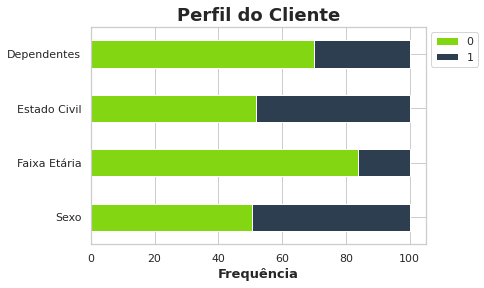

In [ ]:
#Vars
color = ("#82D712","#2C3E50")

# Grafíco de Frequencia
perfil = dist_freq.T.plot(kind='barh',stacked=True, color=color)
perfil.set_title("Perfil do Cliente", fontsize = 18, fontweight='bold')

# Label
perfil.set_xlabel('Frequência', fontsize=13, fontweight='bold')

# Legends
plt.legend(bbox_to_anchor=(1,1), fontsize=11)

#Grid
plt.show()



---

<font color=82D712 size="5"><b>Conclusões</b></font>

<p>A partir do gráfico pode-se traçar as seguintes caracteristicas dos clientes:</p>

<font color=82D712><b>1.</b></font> Maior parte dos clientes não possuem <b><em>dependentes</em></b>. <br>
<font color=82D712><b>2.</b></font> Maior parte dos clientes não são <b><em>Idosos</em></b> (idade < 65 anos). <br>
<font color=82D712><b>3.</b></font> Quanto ao <b><em>Sexo</em></b> e <b><em>estado civil</em></b> a proporção está bem equlibrida (quase 50%) entre <em>solteiros</em> e <em>com parceiros</em>, assim como o <em>mulheres</em> e <em>homens</em>.<br>


# <font color=2C3E50>**04. Primeira Hipótesis**

A <font color=82D712><b>Primeira hipótese</b></font> é há da possibilidade de clientes que pagaram um valor acima da media geral na Cobrança Mensal possuem maior taxa de evasão que os outros, e caso a hipotese seja confirmada, analizar a razão deste valor elevado. A hipótese será explorada da seguinte forma:<br> 


<font color=82D712><b>1.</b></font> <b>Criar</b> um histograma de frequencia dos Gastos dos clientes.<br>
<font color=82D712><b>2.</b></font> <b>Verificar</b> se há relação de churn entre os tipos de contrato.<br>
<font color=82D712><b>3.</b></font> <b>Verificar</b> a relação de churn entre os cliente que pagaram um valor acima da media geral.<br>
<font color=82D712><b>4.</b></font> Caso o item 3 seja confirmado: <b>Analizar</b> a razão do valor pago elevado.<br>



In [ ]:
# Criando um DataFrame 
gastos_clientes = pd.DataFrame(data= df_aluravoz, columns=['Churn', 'Cobrança_Mensal', 'Cobrança_Total', 
                                                           'Contrato_Mensal', 'Contrato_Anual', 'Contrato_Bianual'])
gastos_clientes.head(2)

,Churn,Cobrança_Mensal,Cobrança_Total,Contrato_Mensal,Contrato_Anual,Contrato_Bianual
0,0,65.6,593.3,0,1,0
1,0,59.9,542.4,1,0,0


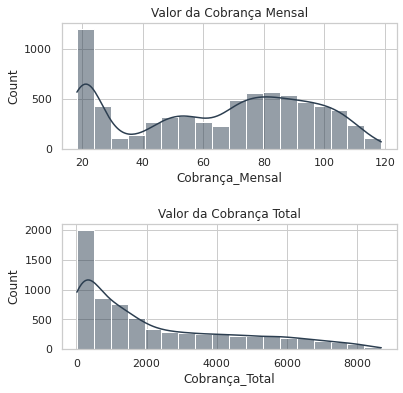

In [ ]:
#Criando histogramas de frequencia para contrato mensal e o contrato anual
fig, axs = plt.subplots(nrows=2, figsize=(6, 6))
plt.subplots_adjust(hspace = 0.6)

#plot
ax = sns.histplot(data=gastos_clientes['Cobrança_Mensal'], ax=axs[0], bins = 18, color="#2C3E50", kde=True)

ax1 = sns.histplot(data=gastos_clientes['Cobrança_Total'], ax=axs[1], bins = 18, color="#2C3E50", kde=True)

ax.set(title='Valor da Cobrança Mensal')
ax1.set(title='Valor da Cobrança Total')

plt.show()



---

<font color=82D712 size="5"><b>Conclusões</b></font>

* A maioria dos clientes pagam entre `R$ 0,00 - R$ 20,00` na cobrança mensal
* A maioria dos clientes pagaram entre`R$ 0,00 - R$ 50,00` na cobrança anual
* Para um modelo baseado em pagamentos recorrentes essa cobrança anual esta muito baixa e já indica um problema no tenure (tempo de contrato)

## <font color=2C3E50>**04.1 Verificando a relação do churn por contrato**

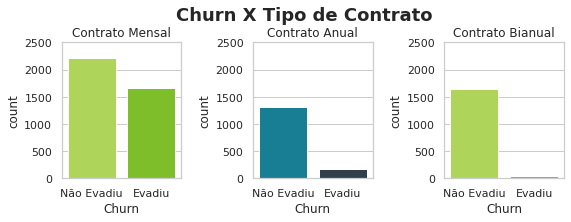

In [ ]:
# Plot
fig, axs = plt.subplots(ncols=3, figsize=(9, 2.5))
plt.subplots_adjust(wspace = 0.6)
fig.suptitle("Churn X Tipo de Contrato", y=1.08 ,fontsize = 18, fontweight='bold')

#Vars
colorA = ("#B6EA44","#82D712")
colorB = ("#048BA8","#2C3E50")
labels = ('Não Evadiu', 'Evadiu')
limites = (0, 2500)

CMensal = gastos_clientes.query("Contrato_Mensal == 1")
CAnual = gastos_clientes.query("Contrato_Anual == 1")
CBianual = gastos_clientes.query("Contrato_Bianual == 1")

# Plot do churn por gasto
ax = sns.countplot(x="Churn", data=CMensal, 
                   ax=axs[0], palette=colorA)

ax1 = sns.countplot(x="Churn", data=CAnual, 
                   ax=axs[1], palette=colorB)

ax2 = sns.countplot(x="Churn", data=CBianual, 
                   ax=axs[2], palette=colorA)

# Adiciona a legenda e detalhes do axis

ax.set(ylim=limites, xticklabels=labels, title='Contrato Mensal')
ax1.set(ylim=limites, xticklabels=labels, title='Contrato Anual')
ax2.set(ylim=limites, xticklabels=labels, title='Contrato Bianual')

fig.show()



---

<font color=82D712 size="5"><b>Conclusões</b></font>

* Clientes que possuem contrato do tipo mensal apresentam maior churn, mas, também maior quantidade de clientes.
* O contrato bianul teve a menor quantidade de churn.
* O contrato do tipo anual possui a menor quantidade de clientes, mas, o churn se apresenta maior que o bianual (que possui mais clientes)

## <font color=2C3E50>**04.2 Verificando a relação do churn por Media de Gastos**

In [ ]:
# Estabelecendo filtros de acordo com Mediana dos Gastos
mediana = gastos_clientes['Cobrança_Mensal'].median()

#
filtro_baixo = gastos_clientes.query("Cobrança_Mensal < 70.35")
filtro_alto = gastos_clientes.query("Cobrança_Mensal >= 70.35")

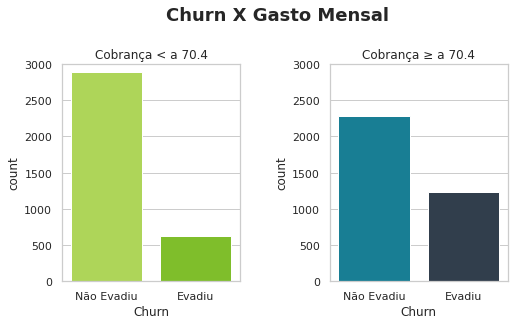

In [ ]:
# Plot
fig, axs = plt.subplots(ncols=2, figsize=(8,4))
plt.subplots_adjust(wspace = 0.5)
fig.suptitle("Churn X Gasto Mensal", y=1.08 ,fontsize = 18, fontweight='bold')

#Vars
colorA = ("#B6EA44","#82D712")
colorB = ("#048BA8","#2C3E50")

# Plot do churn por gasto
ax = sns.countplot(x="Churn", data=filtro_baixo, 
                   ax=axs[0], palette=colorA)

ax1 = sns.countplot(x="Churn", data=filtro_alto, 
                   ax=axs[1], palette=colorB)


#Adiciona a legenda e detalhes do axis

ax.set(ylim=(0, 3000), xticklabels=('Não Evadiu', 'Evadiu'), title='Cobrança < a 70.4')
ax1.set(ylim=(0, 3000), xticklabels=('Não Evadiu', 'Evadiu'), title='Cobrança ≥ a 70.4')

fig.show()


---
<font color=82D712 size="5"><b>Conclusões</b></font>

De acordo com o gráfico podemos inferir que a hipótese 1 é verdadeira, os dados apresentam que, no caso do clientes que pagam abaixo da mediana de gastos apresentam um churn bem menor quanto aos de alto gasto. Quais produtos estão contribuindo para esse gasto elevado?

# <font color=2C3E50>**05. Segunda Hipótesis**

A <font color=82D712><b>Segunda Hipótese</b></font> tem como foco os produtos. A empresa oferta dois três de serviços, sendo elas, linhas telefônicas, serviços de Internet DSL e Internet Fibra Otica. Será analisado para cada serviço (e os produtos que englobam) a quantidade de churn e verificar se, existe alguma relação entre o tipo de serviço e as características dos clientes, com um foco, em especial, a idade (Cidadão Senior).

<font color=82D712><b>1.</b></font> <b>Verificar</b> se há relação de churn entre os serviços ofertados<br>
<font color=82D712><b>2.</b></font> <b>Verificar</b> se há relação de churn entre os sub-produtos<br>
<font color=82D712><b>3.</b></font> <b>verificar</b> se há relação entre o tipo de serviço e o perfil dos clientes <br>

As bibliotecas que serão usadas são:
>O <font color=82D712><b>Plotly</b></font> para criar gráficos interativos

In [ ]:
produtos = pd.DataFrame(data=df_aluravoz, columns=['Telefonia', 'Internet_DSL', 'Internet_Fiber_Optic', 'Churn'])
produtos.head()

,Telefonia,Internet_DSL,Internet_Fiber_Optic,Churn
0,1,1,0,0
1,1,1,0,0
2,1,0,1,1
3,1,0,1,1
4,1,0,1,1


## <font color=2C3E50>**05.1. Verificando a % de clientes para cada Produto**

In [ ]:
percentualT = round(produtos['Telefonia'].value_counts(normalize = True) * 100, 2)
percentualI = round(produtos['Internet_DSL'].value_counts(normalize = True) * 100, 2)
percentualST = round(produtos['Internet_Fiber_Optic'].value_counts(normalize = True) * 100, 2)

freq = pd.DataFrame({'Telefônia (%)': percentualT, 
                       'Internet: DSL (%)': percentualI,
                       'Internet: Fiber Optic (%)': percentualST,})
freq.rename(index = {0: 'Não Possui', 1: 'Possui'}, inplace = True)
freq

,Telefônia (%),Internet: DSL (%),Internet: Fiber Optic (%)
Não Possui,9.68,65.63,56.04
Possui,90.32,34.37,43.96


In [ ]:
mesh_names = ['Telefônia (%)','Internet: DSL (%)','Internet: Fiber Optic (%)']
colors = ['#82D712','#2C3E50']

app = JupyterDash(__name__)

app.layout = html.Div([
    html.Header(className="app-header"),

    html.H2('Relação de Quantidade de Assinatura por Produtos'),
    html.P("Escolha um Produto:"),
    dcc.Dropdown(id='page-1-dropdown', options = mesh_names, value= mesh_names[0]), 
    dcc.Graph(id="graph-1")
])

@app.callback(
    Output("graph-1", "figure"),
    Input('page-1-dropdown', 'value'))
def generate_chart(name):
    filtro_freq = freq[name]
    fig = px.pie(freq, values=filtro_freq, names=freq.index,hole=.2,
                 color_discrete_sequence = colors)
    return fig

app.run_server(mode='inline',debug=True,port=8051)

<IPython.core.display.Javascript object>



---


<font color=82D712 size="5"><b>Conclusões</b></font>

Ficou claro que a quantidade de clientes por produtos segue a ordem de:<br>

<font color=2C3E50 text-align=center><b>Telefonia (90.3%) > Internet Fibra Optica (44%) > Internet DSL (34.4%)</b>

<br>

## <font color=2C3E50>**05.2. Verificando a relação entre os produtos e o churn**

In [ ]:
produtosT = round(produtos.query("Telefonia >= 1")['Churn'].value_counts (normalize = True) * 100, 2)
produtosDSL = round(produtos.query("Internet_DSL >= 1")['Churn'].value_counts (normalize = True) * 100, 2)
produtosFO = round(produtos.query("Internet_Fiber_Optic >= 1")['Churn'].value_counts(normalize = True) * 100, 2)

freq1 = pd.DataFrame({'Telefônia': produtosT, 
                       'Internet: DSL': produtosDSL,
                       'Internet: Fiber Optic': produtosFO,})
freq1.rename(index = {0: 'Não Evadiu', 1: 'Evadiu'}, inplace = True)
freq1

,Telefônia,Internet: DSL,Internet: Fiber Optic
Não Evadiu,73.29,81.04,58.11
Evadiu,26.71,18.96,41.89


In [ ]:
mesh_churn = ['Telefônia','Internet: DSL','Internet: Fiber Optic']
colors = ['#82D712','#2C3E50']

app1 = JupyterDash(__name__)
app1.layout = html.Div([
    html.Header(className="app-header"),

    html.H2('Relação entre os produtos e o churn'),
    html.P("Escolha um Produto:"),
    dcc.Dropdown(id='page-2-dropdown', options = mesh_churn, value= mesh_churn[0]), 
    dcc.Graph(id="graph-2"),
])
#callback 2
@app1.callback(
    Output("graph-2", "figure"),
    Input('page-2-dropdown', 'value'))
def generate_chart(name):
    filtro_freq1 = freq1[name]
    fig = px.pie(freq1, values=filtro_freq1, names=freq1.index, hole=.2,
                 color_discrete_sequence = colors)
    return fig

app1.run_server(mode='inline')

<IPython.core.display.Javascript object>

---


<font color=82D712 size="5"><b>Conclusões</b></font>

A quantidade de churn por produtos segue a ordem de:<br>

<font color=2C3E50><b>Telefonia (27.1%) < Internet DSL(19%) < Internet Fibra Optica (41.9%)</b>

<br>

## <font color=2C3E50>**05.3. Verificando a relação entre os sub-produtos e o churn**

In [ ]:
sub_produtos = pd.DataFrame(data=df_aluravoz, columns=['Churn', 'Telefonia', 'Internet_DSL', 'Internet_Fiber_Optic', 
              'Multiplas_Linhas', 'Segurança_On-line', 'Backup_On-line', 'Proteção_Dispositivos', 'Suporte_Técnico', 'TV_Streaming','Streaming_Filmes'])
sub_produtos.head()

,Churn,Telefonia,Internet_DSL,Internet_Fiber_Optic,Multiplas_Linhas,Segurança_On-line,Backup_On-line,Proteção_Dispositivos,Suporte_Técnico,TV_Streaming,Streaming_Filmes
0,0,1,1,0,0,0,1,0,1,1,0
1,0,1,1,0,1,0,0,0,0,0,1
2,1,1,0,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,1,0,1,1
4,1,1,0,1,0,0,0,0,1,1,0


In [ ]:
#subprodutos = []
#produtos = []
#valor = []

#for col in sub_produtos.columns:
  #subprodutos.append(col),
  #valor.append(sub_produtos.query("Churn >= 1")[col].value_counts(ascending=True))

In [ ]:
#Descobrindo a frequencia de churn para cada coluna do dataframe 

for col in sub_produtos:
   print("="*40)
   print('Quantidade de Valores Únicos da Coluna:', col)
   print('')
   print(sub_produtos.query("Churn >= 1")[col].value_counts())
   print('')

In [ ]:
# Criando o Gráfico
data = dict(
    subprodutos=["Telefônia", "Internet","Multiplas_Linhas","Segurança_On-line", "Backup_On-line",
                 'Proteção_Dispositivos','Suporte_Técnico', 'TV_Streaming','Streaming_Filmes'],          
    produtos=["", "", "Telefônia", "Internet", "Internet", "Internet", "Internet", "Internet", "Internet"],
    valor=[1699, 1756, 850, 295, 523, 545, 310, 814, 818])

fig_sunburst = px.sunburst(data, names='subprodutos', parents='produtos',
    values='valor', color_discrete_sequence = colors)

fig_sunburst.show()



---
<font color=82D712 size="5"><b>Conclusões</b></font>

1. Quanto aos sub-produtos da <font color=82D712><b>Telefônia</b></font>:
    * O serviço de telefônia possui apenas o sub-produto <b>Multiplas Linhas</b> que apresenta *menos da metade* do churn deste produto
        
    <br>
    
2. Quanto aos sub-produtos da <font color=82D712><b>Internet</b></font>:
    * Os serviços relacionados ao <b>StremingTV</b> (tv a cabo) e <b>Streming Filmes</b> possuem *grande* taxa de churn.
    * <b>Proteção de Dispositivos</b> e <b>Backup online</b> também apresentam uma quantidade *consideravel* de churn
    * <b>Suporte Técnico</b> e <b>Segurança Online</b> possuem a *menor quantidade* de churn.



# <font color=2C3E50>**06. Terceira Hipótese**

A <font color=82D712><b>Terceira Hipótese</b></font> buscar identificar se existe alto churn entre os clientes que possuem tempo de contrato (tenure). A hipótese será explorada da seguinte forma:<br> 

<font color=82D712><b>1.</b></font> <b>Criar</b> um histograma de frequencia do Tenure.<br>
<font color=82D712><b>2.</b></font> <b>Verificar</b> se há relação de churn e o tenure.<br>
<font color=82D712><b>3.</b></font> <b>Verificar</b> a relação entre o churn, tenure e o perfil dos clientes.<br>

In [ ]:
ternure = pd.DataFrame(data=df_aluravoz, columns=['Tenure','Churn'])
ternure.head()

,Tenure,Churn
0,9,0
1,9,0
2,4,1
3,13,1
4,3,1


 ## <font color=2C3E50>**06.1. Histograma de frequência do Tenure.**

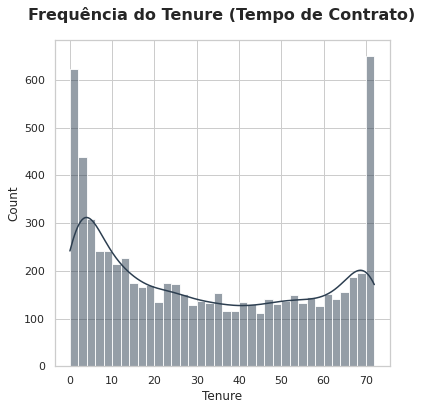

In [ ]:
bin = round(ternure.Tenure.unique().shape[0] /2) #decidindo o numero de colunas para o histográfico

f, ax = plt.subplots(figsize=(6, 6))
sns.set_theme(style="whitegrid")
ax.set_title('Frequência do Tenure (Tempo de Contrato)', 
             fontsize=16, pad=20, weight='bold')

#plot
sns.histplot(data=df_aluravoz.Tenure,bins=bin, color="#2C3E50", kde=True)

plt.show()

---
<font color=82D712 size="5"><b>Conclusões</b></font>

* Nsse histograma *não há normalidade*. 
* Há uma grande quantidade de clientes com tempo de contratação 0 e acima de 65. 
* Logo, vamos identificar se esse comportamento vem da evasão, relacionado as duas variaveis.

## <font color=2C3E50>**06.2. Churn e Tenure**

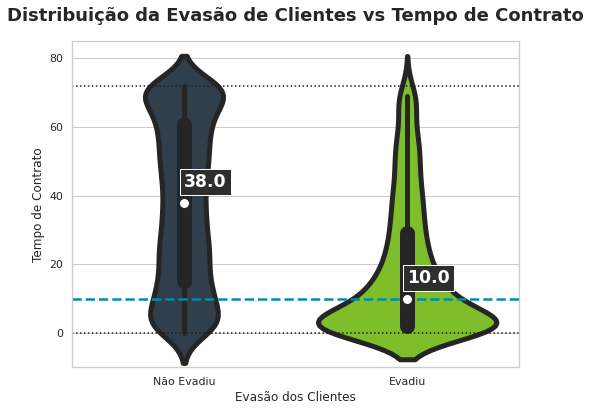

In [ ]:
# Grafíco de Distribuição do churn em relação ao tempo de contrato
f, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Distribuição da Evasão de Clientes vs Tempo de Contrato', 
             fontsize=18, pad=20, weight='bold')

# Plot
ax = sns.violinplot(x="Churn", y="Tenure", data=ternure, 
                    palette={0:"#2C3E50", 1:"#82D712"}, 
                    edgecolor="gray", linewidth=5, fontsize = 14)

# Anotações Estatísticas
medians = ternure.groupby(['Churn'])['Tenure'].median()

for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick] + 4.5, medians[xtick], 
            horizontalalignment='left', size='x-large',
            color='w',weight='bold', bbox={'facecolor':'#2E2E2E'})

#Inserir linhas de max, min e a media (para que evadiu)
ax.axhline(max(ternure['Tenure']), color = 'k', linestyle=':', linewidth=1.5)
ax.axhline(min(ternure['Tenure']), color = 'k', linestyle=':', linewidth=1.5)
ax.axhline(10, color = '#048BA8', linestyle='--', linewidth=2.5)

#Grid
ax.set(ylim=(-10, 85), xticklabels=('Não Evadiu', 'Evadiu'), 
       xlabel=('Evasão dos Clientes'), ylabel=('Tempo de Contrato'))

plt.show()

---
<font color=82D712 size="5"><b>Conclusões</b></font>

* O churn está muito concentrado em quem possui *10 ou menos tempo de contrato*, o que explica o comportamento identificado pelo histograma. 
* Uma razão para esta questão é a de que pode ter a ver com a <b>qualidade dos produtos</b> ou a <b>expectativa</b> que os clientes tinham do produto. Alguns dados que poderiam ser relacionados seria a de relação do <b>perfil dos clientes</b> com esse fator, por exemplo, foi identificado que há uma quantidade de Idosos maior e que, em geral, possuem necessidades mais basicas quanto a intenet e uso de telefone. 
* Deste modo, podemos analisar os dados já considerando esses perfils e traçar algumas razões para esse quadro.

## <font color=2C3E50>**06.3. Evasão  X  Churn  X  Perfil de Clientes**

In [ ]:
ECP = pd.DataFrame(data=df_aluravoz, columns=['Tenure','Churn', 'Sexo', 'Idoso', 'Parceiros', 'Dependentes'])
ECP.head()

,Tenure,Churn,Sexo,Idoso,Parceiros,Dependentes
0,9,0,1,0,1,1
1,9,0,0,0,0,0
2,4,1,0,0,0,0
3,13,1,0,1,1,0
4,3,1,1,1,1,0


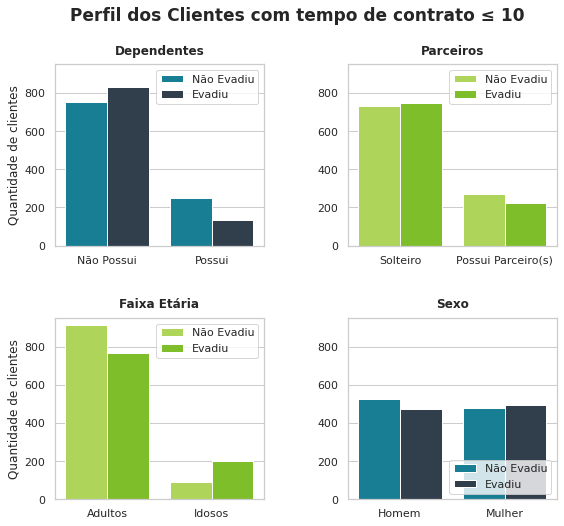

In [ ]:
# Vars
labels = ('Não Evadiu','Evadiu')
filtro = ECP.query("Tenure <= 10")

#Plot - Perfil dos Clientes com tempo de contrato ≤ 10
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(9, 8))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
st = fig.suptitle("Perfil dos Clientes com tempo de contrato ≤ 10", 
                  fontsize = 17, fontweight='bold')

#plot - Dependentes vs tempo de contrato ≤ 10
ax = sns.countplot(x="Dependentes", hue="Churn", data=filtro,
                   ax=axs[0,0], palette={0:"#048BA8", 1:"#2C3E50"})

ax.set_title('Dependentes',fontsize=12, pad=10, weight='bold')
ax.set(ylabel='Quantidade de clientes',xlabel='', 
       xticklabels=('Não Possui', 'Possui'), ylim=(0, 950))
ax.legend(fontsize = 11, labels = labels)

#plot - Parceiros vs tempo de contrato ≤ 10
ax = sns.countplot(x="Parceiros", hue="Churn", data=filtro, 
                   ax=axs[0,1], palette={0:"#B6EA44", 1:"#82D712"})

ax.set_title('Parceiros',fontsize=12, pad=10, weight='bold')
ax.set(xlabel='', ylabel='', xticklabels=('Solteiro', 'Possui Parceiro(s)'), ylim=(0, 950))
ax.legend(fontsize = 11, labels = labels)

#plot - Cidadão Senior vs tempo de contrato ≤ 10
ax = sns.countplot(x="Idoso", hue="Churn", data=filtro, 
                   ax=axs[1,0],palette={0:"#B6EA44", 1:"#82D712"})

ax.set_title('Faixa Etária',fontsize=12, pad=10, weight='bold')
ax.set(xlabel='', ylabel='Quantidade de clientes', xticklabels=('Adultos', 'Idosos'), ylim=(0, 950))
ax.legend(fontsize = 11, labels = labels)

#plot - Sexo vs tempo de contrato ≤ 10
ax = sns.countplot(x="Sexo", hue="Churn", data=filtro, 
                   ax=axs[1,1], palette={0:"#048BA8", 1:"#2C3E50"})

ax.set_title('Sexo',fontsize=12, pad=10, weight='bold')
ax.set(xlabel='', ylabel='', xticklabels=('Homem', 'Mulher'), ylim=(0, 950))
ax.legend(loc='lower right', fontsize = 11, labels = labels)

#Mostrar o Grafíco
plt.show()

---
<font color=82D712 size="5"><b>Conclusões</b></font>

* Clientes que <b>não possui dependentes</b> e <b>parceiros</b> tem mais chances de evadir
* Há poucos clientes que são <b>idosos</b> e começaram contrato recentemente, mas grande parte dos que começaram, evadiram.
* <b>Jovens</b> possuem mais pessoas que não evadiram do que evadiram, porém, também apresenta uma alta quantidade de churn.
* O <b>Sexo</b> se comporta de forma bastante regular, mantendo a proporção visualizada no Perfil dos clientes. Sendo, então, possivel determinar que *não há relação entre o churn e o sexo*.

1. Respondendo a hipótese de que o churn tenha origem na expectativa e necessidades que os clientes tinham com produto, o gráfico aponta a seguinte informação:
    - Pessoas que <b>não possuem depententes</b> e <b>estão solteiras</b>, tendem a ser mais jovens, este fato somado com o fato do churn desta faixa etária ser elevado (assim como a quantidade abaixo de 10 de ternure) indicam que os serviços ofertados podem *não serem capazes de suprirem está faixa étari*a.
    - Também se pode fazer um argumento de que há uma quantidade, pequena, mas relevante de <b>novos clientes idosos que estão evadindo</b>. O que pode nos informar que não há uma evasão forte de clientes idosos com ternure alto por *acomodação dessa população* ao seriço contratato.

# <font color=2C3E50>**07. Conclusões**

Em suma, a evasão parece estar concetrada entre os <font color=82D712><b>primeiros meses de contrato</b></font> dos clientes, e que em geral, apresentam um <font color=82D712><b>perfil predominantente jovens e solteiros, sem dependetentes</b></font>, indicando que os produtos ofertados não estão sendo suficientes para suprir a necessidade dessa parcela da população.<br>
Entre os produtos ofertados a <font color=82D712><b>fibra optica</b></font> é a que mais possui churn relativo (quantidade de clientes/churn), visto que no mercado a procura desse tipo de produto esta em alta pode indicar um sério problema de qualidade nesse produto e na sua competitividade com os concorrentes. Nessa linha, os sub-produtos de internet, apresentaram uma quantidade grande de churn relevantes, em especial os relacionados ao <font color=82D712><b>serviço de streming</b></font>, que também são serviços de alta procura, levando a conclusão de que a competitivdade destes também está baixa.<br>
Conclui-se que a melhor forma para minimizar a evasão de clientes na Alura Voz é ter um <b>modelo treinado</b> que vai classificar clientes como potenciais pessoas a deixar a empresa de modo, a auxiliar a equipe de vendas. Dessa forma, o proximo relatório tera como foco a contrução desses modelos.

---
<font color=82D712 size="2"><a href='https://colab.research.google.com/drive/1OEbCcqU4XS1l95fLunfQOuunN6vgx_xW'> <b>Próximo ➜</b></a></font>